In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats as sts
import pingouin as pg
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as me
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedKFold 
from sklearn.linear_model import LinearRegression, LogisticRegression
from collections import Counter
import copy
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [91]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py' --all_tweets True

Starting script...
Removing existing file...
Ending script...


In [92]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937,172880784,18609547,2164986296,1026783544457273345,109604376,1040939562774790144,69734383,119897261
participant_id,1,2,3,None,4,5,6,None,7,8,None,9,10,11,12,13,14,15,16
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade,felipe.ts ⚡,Juan Lopes,Rafael Dantas,iagor com i,T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷,Esdras Xavier,belle-🏴.dev || twitch.tv/bellesamways,Willian Justen
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk,felipefialho_,juanplopes,RaffaelDantass,Iagor51,RafaelMansilha,esdras_xavieer,bellesamways,Willian_justen
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil.",Dark Side of the Moon,"Rio de Janeiro, Brasil","São Paulo, Brasil",Pvh,"Palmas, Tocantins, Brasil","Jaraguá do Sul, Brasil",Curitiba,"Petrópolis, Brasil"


In [93]:
tweets = []

for d in data:
    if data[d]['bigfive']:
        tweets.append(data[d]['tweets'])

final_tweets = []
for i in tweets:
    final_tweets.extend(i)
    
print(len(final_tweets))

91632


In [94]:
def create_tweets_df(tweets):
    df = pd.DataFrame(final_tweets)

    df.columns = ["id", "id_str_twitter", "text", "created_at", "favorite_count", "retweet_count", 
                  "lang", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity", 
                  "vader_sentiment_analysis_polarity_5_cat", "oplexicon_sentiment_analysis_score",
                  "oplexicon_sentiment_analysis_polarity", "oplexicon_sentiment_analysis_polarity_5_cat",
                  "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                  "sentistrength_sentiment_analysis_polarity_5_cat", "sentilexpt_sentiment_analysis_score",
                  "sentilexpt_sentiment_analysis_polarity", "sentilexpt_sentiment_analysis_polarity_5_cat",
                  "liwc_sentiment_analysis_score", "liwc_sentiment_analysis_polarity",
                  "liwc_sentiment_analysis_polarity_5_cat", "final_score", "final_score_ensemble",
                  "final_polarity", "final_polarity_ensemble", "text_updated", "is_retweet", "retweet_updated"
                 ]
    
    del df["text_updated"]
    del df["is_retweet"]
    del df["retweet_updated"]
    del df["favorite_count"]
    del df["retweet_count"]
    del df["lang"]
    del df["id_str_twitter"]
    
    return df

In [95]:
tweets_df = create_tweets_df(final_tweets)
print(len(tweets_df))
tweets_df.head()

91632


,id,text,created_at,id_user,vader_sentiment_analysis_score,vader_sentiment_analysis_polarity,vader_sentiment_analysis_polarity_5_cat,oplexicon_sentiment_analysis_score,oplexicon_sentiment_analysis_polarity,oplexicon_sentiment_analysis_polarity_5_cat,...,sentilexpt_sentiment_analysis_score,sentilexpt_sentiment_analysis_polarity,sentilexpt_sentiment_analysis_polarity_5_cat,liwc_sentiment_analysis_score,liwc_sentiment_analysis_polarity,liwc_sentiment_analysis_polarity_5_cat,final_score,final_score_ensemble,final_polarity,final_polarity_ensemble
0,102566,"Atenção, estou mudando os moveis da sala de lu...",2021-03-31T19:13:28,26,-0.4588,neg,w_neg,0.000000,neu,neu,...,0.00,neu,neu,0.0000,neu,neu,-0.091760,0.000,neg,neu
1,102567,RT @andreariell: o cancelamento dos participan...,2021-03-31T12:28:56,26,0.0000,neu,neu,0.000000,neu,neu,...,0.00,neu,neu,-0.0667,neg,w_neg,-0.013340,0.000,neg,neu
2,102568,RT @AndrewBrobston: NOVA ANTECIPAÇÃO\nBoa tard...,2021-03-31T12:17:06,26,0.7734,pos,s_pos,0.458831,pos,w_pos,...,0.00,neu,neu,0.0196,pos,w_pos,0.250366,0.000,pos,neu
3,102569,"@DouglasMarendaz Eu amo muito meu pai, mas fal...",2021-03-31T11:46:04,26,-0.8720,neg,s_neg,0.458831,pos,w_pos,...,-0.25,neg,w_neg,0.0400,pos,w_pos,-0.074634,0.000,neg,neu
4,102571,@lilicebk Eu cresci numa casa cheia de gente e...,2021-03-30T17:58:24,26,-0.6808,neg,s_neg,0.000000,neu,neu,...,-0.25,neg,w_neg,0.0000,neu,neu,-0.186160,-0.125,neg,neg


In [96]:
print(tweets_df['id_user'].value_counts())

43    24077
32     9385
37     6456
31     5993
28     5932
26     5038
44     4928
38     4708
27     4548
41     4386
39     3944
30     3171
42     2698
35     2595
40     2228
34     1545
Name: id_user, dtype: int64


In [97]:
for i in tweets_df.index:
    t = tweets_df.iloc[i]
    d = pd.to_datetime(t['created_at']).to_pydatetime()
    date_from = datetime.datetime(year = d.year, month = d.month, day = d.day, hour = 9)
    date_to = datetime.datetime(year = d.year, month = d.month, day = d.day, hour = 18)
    if date_from <= d <= date_to and d.weekday() in [0,1,2,3,4]:
        tweets_df.at[i,'is_work_time'] = int(1)
    else:
        tweets_df.at[i,'is_work_time'] = int(0)

In [98]:
print(tweets_df['is_work_time'].value_counts())

0.0    52703
1.0    38929
Name: is_work_time, dtype: int64


In [99]:
tweets_df.head()

,id,text,created_at,id_user,vader_sentiment_analysis_score,vader_sentiment_analysis_polarity,vader_sentiment_analysis_polarity_5_cat,oplexicon_sentiment_analysis_score,oplexicon_sentiment_analysis_polarity,oplexicon_sentiment_analysis_polarity_5_cat,...,sentilexpt_sentiment_analysis_polarity,sentilexpt_sentiment_analysis_polarity_5_cat,liwc_sentiment_analysis_score,liwc_sentiment_analysis_polarity,liwc_sentiment_analysis_polarity_5_cat,final_score,final_score_ensemble,final_polarity,final_polarity_ensemble,is_work_time
0,102566,"Atenção, estou mudando os moveis da sala de lu...",2021-03-31T19:13:28,26,-0.4588,neg,w_neg,0.000000,neu,neu,...,neu,neu,0.0000,neu,neu,-0.091760,0.000,neg,neu,0.0
1,102567,RT @andreariell: o cancelamento dos participan...,2021-03-31T12:28:56,26,0.0000,neu,neu,0.000000,neu,neu,...,neu,neu,-0.0667,neg,w_neg,-0.013340,0.000,neg,neu,1.0
2,102568,RT @AndrewBrobston: NOVA ANTECIPAÇÃO\nBoa tard...,2021-03-31T12:17:06,26,0.7734,pos,s_pos,0.458831,pos,w_pos,...,neu,neu,0.0196,pos,w_pos,0.250366,0.000,pos,neu,1.0
3,102569,"@DouglasMarendaz Eu amo muito meu pai, mas fal...",2021-03-31T11:46:04,26,-0.8720,neg,s_neg,0.458831,pos,w_pos,...,neg,w_neg,0.0400,pos,w_pos,-0.074634,0.000,neg,neu,1.0
4,102571,@lilicebk Eu cresci numa casa cheia de gente e...,2021-03-30T17:58:24,26,-0.6808,neg,s_neg,0.000000,neu,neu,...,neg,w_neg,0.0000,neu,neu,-0.186160,-0.125,neg,neg,1.0


In [100]:
# - Criação do dataset com os scores das inferências geradas pelo ensemble 
# - Dois datasets: um com scores para tweets dentro do horário de trabalho
#   e outro para tweets fora do horário de trabalho           

def create_datasets():
    work_times = tweets_df.loc[tweets_df['is_work_time'] == 1]['final_score_ensemble']
    non_work_times = tweets_df.loc[tweets_df['is_work_time'] == 0]['final_score_ensemble']
    work_times_df = pd.DataFrame(work_times)
    non_work_times_df = pd.DataFrame(non_work_times)
    return (work_times_df, non_work_times_df)

#     print(len(work_times))
#     print(len(non_work_times))

In [101]:
work_times_df, non_work_times_df = create_datasets()

In [102]:
pg.normality(work_times_df)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
final_score_ensemble,0.965329,0.0,False


/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

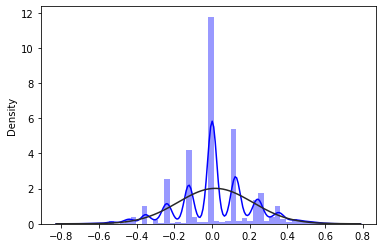

In [103]:
sns.distplot(work_times_df, fit = sts.norm, kde = True, color = 'blue')
plt.plot()

In [104]:
pg.normality(non_work_times_df)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
final_score_ensemble,0.966166,0.0,False


/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

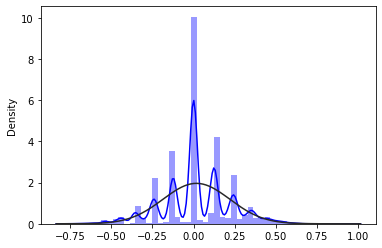

In [105]:
sns.distplot(non_work_times_df, fit = sts.norm, kde = True, color = 'blue')
plt.plot()

In [106]:
# Tentativa de t-test

sts.ttest_ind(work_times_df['final_score_ensemble'], non_work_times_df['final_score_ensemble'], equal_var=False)

Ttest_indResult(statistic=-0.4505839980458342, pvalue=0.6522905512123373)

In [107]:
print(np.mean(tweets_df['final_score_ensemble']))
print(np.mean(work_times_df))
print(np.mean(non_work_times_df))

0.01700903611467661
final_score_ensemble    0.016662
dtype: float64
final_score_ensemble    0.017265
dtype: float64


In [108]:
# Excluindo os tweets neutros

def remove_neutral_tweets(work_times_df, non_work_times_df):
    work_times_df = work_times_df[work_times_df['final_score_ensemble'] != 0]
#     print(len(work_times_df))
    non_work_times_df = non_work_times_df[non_work_times_df['final_score_ensemble'] != 0]
#     print(len(non_work_times_df))
    return (work_times_df, non_work_times_df)

In [109]:
# Tentativa de t-test

sts.ttest_ind(work_times_df['final_score_ensemble'], non_work_times_df['final_score_ensemble'], equal_var=False)

Ttest_indResult(statistic=-0.4505839980458342, pvalue=0.6522905512123373)

In [110]:
def scale_datasets(work_times_df, non_work_times_df):
    scaler = StandardScaler()
    work_times_df_scaled = pd.DataFrame(scaler.fit_transform(work_times_df))
    non_work_times_df_scaled = pd.DataFrame(scaler.fit_transform(non_work_times_df))
    return (work_times_df_scaled, non_work_times_df_scaled)

In [111]:
work_times_df_scaled, non_work_times_df_scaled = scale_datasets(work_times_df, non_work_times_df)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

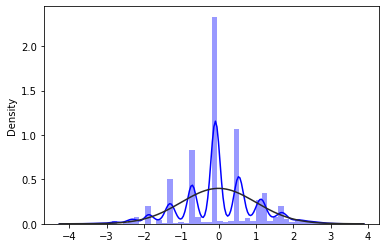

In [112]:
sns.distplot(work_times_df_scaled, fit = sts.norm, kde = True, color = 'blue')
plt.plot()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

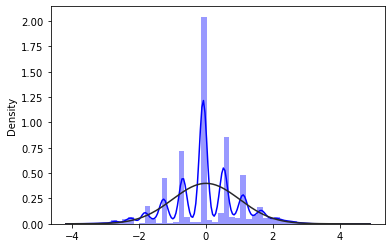

In [113]:
sns.distplot(non_work_times_df_scaled, fit = sts.norm, kde = True, color = 'blue')
plt.plot()

In [114]:
pg.normality(work_times_df_scaled)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
0,0.965378,0.0,False


In [115]:
pg.normality(non_work_times_df_scaled)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
0,0.96634,0.0,False


In [116]:
# Como as distribuições NÃO SÃO NORMAIS, aplica-se testes não paramétricos.

def calculate_mwu_statistic(wt_df, nwt_df):
    return pg.mwu(wt_df, nwt_df)

In [122]:
def calculate_ttest(wt_df, nwt_df):
    return sts.ttest_ind(wt_df, nwt_df, equal_var=False)

In [118]:
# Cálculo da estatística Mann-Withney SEM padronizar os dados

work_times_df, non_work_times_df = create_datasets()
work_times_df, non_work_times_df = remove_neutral_tweets(work_times_df, non_work_times_df)
result = calculate_mwu_statistic(work_times_df, non_work_times_df)
result

,U-val,tail,p-val,RBC,CLES
MWU,442409853.0,two-sided,0.574634,0.002648,0.498676


In [119]:
# Cálculo da estatística Mann-Withney PADRONIZANDO os dados

work_times_df, non_work_times_df = create_datasets()
work_times_df, non_work_times_df = remove_neutral_tweets(work_times_df, non_work_times_df)
work_times_df, non_work_times_df = scale_datasets(work_times_df, non_work_times_df)
result = calculate_mwu_statistic(work_times_df, non_work_times_df)
result

,U-val,tail,p-val,RBC,CLES
MWU,448441506.0,two-sided,0.021113,-0.010949,0.505475


In [120]:
print(np.mean(work_times_df))
print(np.mean(non_work_times_df))

0    4.364417e-15
dtype: float64
0   -2.711356e-15
dtype: float64


In [125]:
# Cálculo da estatística t-test PADRONIZANDO os dados

work_times_df, non_work_times_df = create_datasets()
work_times_df, non_work_times_df = remove_neutral_tweets(work_times_df, non_work_times_df)
work_times_df, non_work_times_df = scale_datasets(work_times_df, non_work_times_df)
result = calculate_ttest(work_times_df, non_work_times_df)
result

Ttest_indResult(statistic=array([2.15128035e-15]), pvalue=array([1.]))

In [126]:
# Cálculo da estatística t-test SEM REMOVER NEUTROS E SEM PADRONIZAR os dados

work_times_df, non_work_times_df = create_datasets()
# work_times_df, non_work_times_df = remove_neutral_tweets(work_times_df, non_work_times_df)
# work_times_df, non_work_times_df = scale_datasets(work_times_df, non_work_times_df)
result = calculate_mwu_statistic(work_times_df, non_work_times_df)
result

,U-val,tail,p-val,RBC,CLES
MWU,1.024810e+09,two-sided,0.790495,0.001002,0.499499


In [127]:
# Cálculo da estatística t-test SEM REMOVER NEUTROS E PADRONIZANDO os dados

work_times_df, non_work_times_df = create_datasets()
# work_times_df, non_work_times_df = remove_neutral_tweets(work_times_df, non_work_times_df)
work_times_df, non_work_times_df = scale_datasets(work_times_df, non_work_times_df)
result = calculate_mwu_statistic(work_times_df, non_work_times_df)
result

,U-val,tail,p-val,RBC,CLES
MWU,1.151157e+09,two-sided,1.236584e-222,-0.122163,0.561082
